In [116]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
def calculate_value(values, knapsack):
    return sum([values[k] for k in knapsack])

def calculate_weight(weights, knapsack):
    return sum([weights[k] for k in knapsack])

def value_decreasing_solution(weights, values, capacity):
    knapsack = []
    inds = values.argsort()[::-1]
    curr_weight = 0
    for k in inds:
        if (curr_weight + weights[k]) <= capacity:
            knapsack.append(k)
            curr_weight += weights[k]
    return knapsack

def weight_decreasing_solution(weights, capacity):
    knapsack = []
    inds = weights.argsort()[::-1]
    curr_weight = 0
    for k in inds:
        if (curr_weight + weights[k]) <= capacity:
            knapsack.append(k)
            curr_weight += weights[k]
    return knapsack

def optimize_solution(knapsack, values, weights, capacity, iterations):
    old_weight = calculate_weight(weights, knapsack)
    num_items = len(weights)
    pool = [item for item in range(num_items) if item not in knapsack]

    for i in range(iterations):
        if (np.random.randint(0, 2)): #attempt swap
            knapsack_idx = np.random.randint(len(knapsack))
            knapsack_item = knapsack[knapsack_idx]

            pool_idx = np.random.randint(len(pool))
            pool_item = pool[pool_idx]

            value_diff = +values[pool_item] - values[knapsack_item]
            new_weight = old_weight + weights[pool_item] - weights[knapsack_item]
            if value_diff >= 0 and new_weight <= capacity:
                knapsack[knapsack_idx] = pool_item
                old_weight = new_weight
                pool[pool_idx] = knapsack_item

        else: #migrate
            pool_idx = np.random.randint(len(pool))
            pool_item = pool[pool_idx]
            new_weight = old_weight + weights[pool_item]
            if new_weight <= capacity:
                knapsack.append(pool_item)
                old_weight = new_weight
                pool.pop(pool_idx)

    return knapsack

In [118]:
capacity = 30
min_weight, max_weight = 1, 10
min_value, max_value = 10, 50

val_sorted_results = []
empty_results = []

for num_items in (100, 250, 500, 1500):
    weights = np.random.randint(min_weight, max_weight + 1, num_items)
    values = np.random.randint(min_value, max_value + 1, num_items)
    
    knapsack_val_decreasing = value_decreasing_solution(weights, values, capacity)
    knapsack_weight_decreasing = weight_decreasing_solution(weights, capacity)

    value_decreasing_opt = optimize_solution(knapsack_val_decreasing, values, weights, capacity, iterations=2_000_000)
    weight_decreasing_opt = optimize_solution(knapsack_weight_decreasing, values, weights, capacity, iterations=2_000_000)
    
    val_sorted_results.append(calculate_value(values, value_decreasing_opt))
    empty_results.append(calculate_value(values, weight_decreasing_opt))

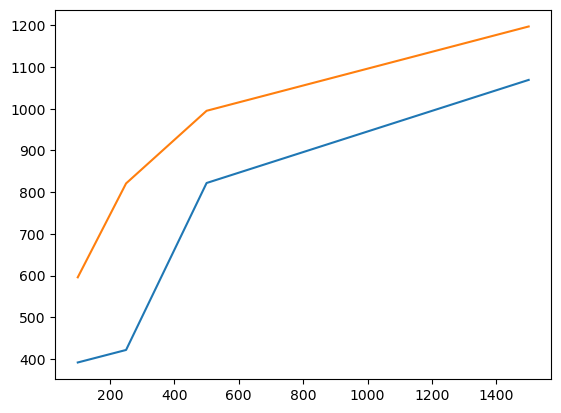

In [ ]:
X = [100, 250, 500, 1500]
plt.plot(X, val_sorted_results)
plt.plot(X, empty_results)